In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stat
import pylab 

In [4]:
#import datasets 
train_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/train_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_df = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/dataset_test_without_rev_features.csv").drop(["Unnamed: 0"], axis = 1)
rev = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
stores_train_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/stores_gk_impuded.csv")
stores_test_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/stores_test_impuded.csv")

busstops = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/busstops_norway.csv')
grunnkrets_age = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_age_distribution.csv')
grunnkrets_household = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_households_num_persons.csv')
grunnkrets_income = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_income_households.csv')
grunnkrets_norway = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_norway_stripped.csv')
plaace_hierarchy = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/plaace_hierarchy.csv')
sample_submission = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/sample_submission.csv')
stores_extra = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_extra.csv')
stores_test = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_test.csv')
stores_train = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_train.csv')


In [5]:
df = grunnkrets_income[grunnkrets_income["year"] == 2016].drop(["year"], axis = 1)
income_df= stores_train_impuded.merge(df, how = "left", on = "grunnkrets_id")

income_df_test = stores_test_impuded.merge(df, how = "left", on ="grunnkrets_id")



In [6]:
income_df_test

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,grunnkrets_name,district_name,municipality_name,area_km2,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,...,Vålerenga rode 4,Vålerenga,Oslo,0.057027,386900.0,294200.0,659000.0,799000.0,624300.0,381500.0
1,916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,...,Kjempa,Gulset,Skien,0.165993,475200.0,272100.0,595400.0,707400.0,713400.0,367900.0
2,913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,...,Stovner senter,Fossum,Oslo,0.236628,451900.0,269100.0,578600.0,662000.0,734000.0,372800.0
3,889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,...,Strindheim 4,Strindheim,Trondheim,0.983436,497400.0,293000.0,614100.0,858400.0,778000.0,413400.0
4,997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,...,Lille Tøyen,Hasle,Oslo,0.449502,489800.0,329900.0,705100.0,819500.0,714700.0,400900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,983164994-983173446-1571,2016,ARNULF LARSSEN AS,2.8.2.0,Kiosks,20040508,SEILANDSVEIEN,70.540508,23.489153,NaN,...,Rypefjord 1,Sørøysund,Hammerfest,0.233519,NaN,NaN,NaN,NaN,NaN,NaN
8573,917194602-917240809-839622,2016,LOSTI AS,3.2.4.0,Spas,10180212,NaN,58.051363,7.648440,NaN,...,Skjernøy,Tregde-Skjernøy,Mandal,0.172808,NaN,NaN,NaN,NaN,NaN,NaN
8574,916236255-916275269-800265,2016,RATT TRANSPORT AS,3.2.4.0,Spas,6280302,VERPENVEIEN 8 B,59.666010,10.569668,NaN,...,Storsand,Nordøstre Hurum,Hurum,2.427799,NaN,NaN,NaN,NaN,NaN,NaN
8575,998529794-975934594-45230,2016,VIKØY SERVICES AS,3.4.2.0,Laundromats and dry cleaners,12190512,KVERNANESVEGEN 238,59.891397,5.114380,NaN,...,Stolmen/Hevrøy,Ytre Austevoll,Austevoll,0.733720,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#income_df_test.to_csv("stores_gk_income_test.csv")
#merged_df.to_csv("stores_gk_income_train.csv")


In [8]:
#train_dist_transformed = pd.DataFrame()

include_list =  ["all_households", "singles", "couple_without_children","couple_with_children", "other_households", "single_parent_with_children"]
income_trans = income_df[include_list]
income_trans_test = income_df_test[include_list]
income_trans_test

,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,386900.0,294200.0,659000.0,799000.0,624300.0,381500.0
1,475200.0,272100.0,595400.0,707400.0,713400.0,367900.0
2,451900.0,269100.0,578600.0,662000.0,734000.0,372800.0
3,497400.0,293000.0,614100.0,858400.0,778000.0,413400.0
4,489800.0,329900.0,705100.0,819500.0,714700.0,400900.0
...,...,...,...,...,...,...
8572,NaN,NaN,NaN,NaN,NaN,NaN
8573,NaN,NaN,NaN,NaN,NaN,NaN
8574,NaN,NaN,NaN,NaN,NaN,NaN
8575,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# simple impuder with mean 

class PandasSimpleImputer(SimpleImputer):
    """A wrapper around `SimpleImputer` to return data frames with columns.
    """

    def fit(self, X, y=None):
        self.columns = X.columns
        return super().fit(X, y)

    def transform(self, X):
        return pd.DataFrame(super().transform(X), columns=self.columns)



In [10]:
income_imp = PandasSimpleImputer().fit_transform(income_trans)
income_imp_test = PandasSimpleImputer().fit_transform(income_trans_test)


In [11]:
income_imp_test

,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,386900.000000,294200.000000,659000.000000,799000.000000,624300.000000,381500.000000
1,475200.000000,272100.000000,595400.000000,707400.000000,713400.000000,367900.000000
2,451900.000000,269100.000000,578600.000000,662000.000000,734000.000000,372800.000000
3,497400.000000,293000.000000,614100.000000,858400.000000,778000.000000,413400.000000
4,489800.000000,329900.000000,705100.000000,819500.000000,714700.000000,400900.000000
...,...,...,...,...,...,...
8572,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8573,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8574,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8575,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795


In [12]:
#Check wether or not a feature is guassian or normal distributed, using Q-Q plot 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])



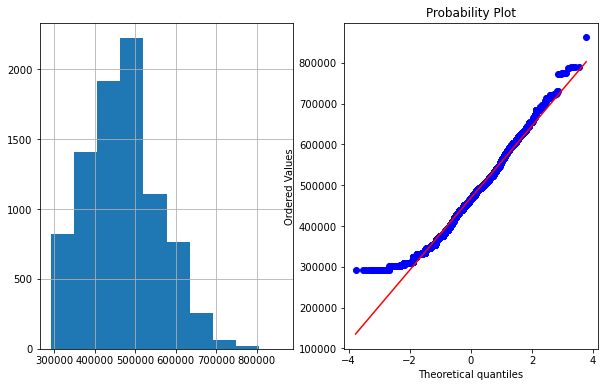

In [13]:
#plot_data(train_dist, "closeststore__distance_lv1_desc")
plot_data(income_imp_test, "all_households")

### Log Transform 

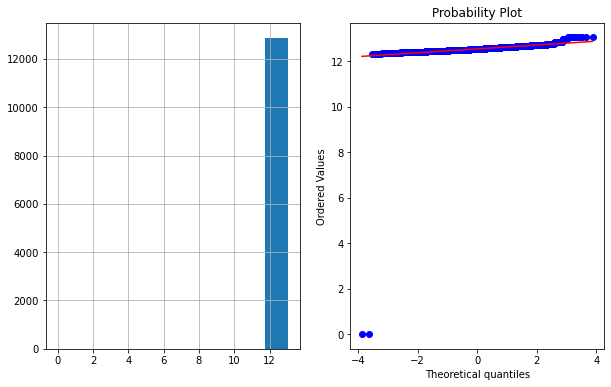

In [14]:
#Taking log(1+x)

#train_dist_transformed["cs_lv1_log"] = np.log(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_log")

income_imp["singles_log"] = np.log(1+income_imp.singles)
plot_data(income_imp, "singles_log")

### Reciprocal Trnasformation

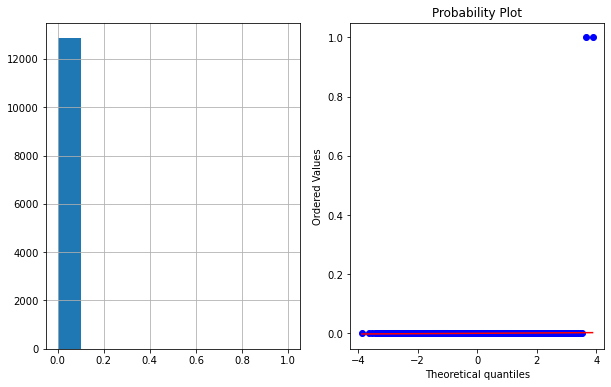

In [15]:
### Taking 1/(1+x)

#train_dist_transformed["cs_lv1_reciprocal"]= 1 / (train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_reciprocal")

income_imp["singles_reciprocal"] = 1 / (1+income_imp.singles)
plot_data(income_imp, "singles_reciprocal")

### Square root transformation 

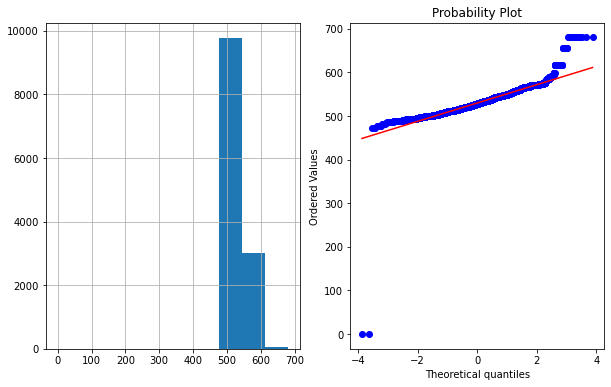

In [16]:
#train_dist_transformed["cs_lv1_squared"] = train_dist["closeststore__distance_lv1_desc"]**(1/2)
#plot_data(train_dist_transformed, "cs_lv1_squared")

income_imp["singles_squared"] = income_imp["singles"]**(1/2)
plot_data(income_imp, "singles_squared")

### Exponential Transdormation

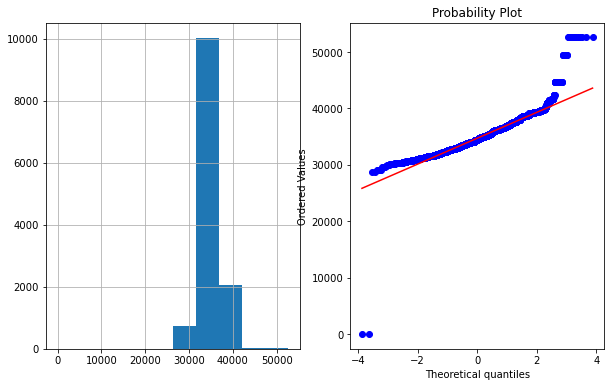

In [17]:
#train_dist_transformed["cs_lv1_exp"] = train_dist["closeststore__distance_lv1_desc"]**(1/1.2)
#plot_data(train_dist_transformed,"cs_lv1_exp")

income_imp["singles_exp"] = income_imp["singles"]**(1/1.2)
plot_data(income_imp, "singles_exp")

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [18]:
#train_dist_transformed["cs_lv1_boxcox"], parameters = stat.boxcox(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_boxcox")

income_imp["singles_boxcox"], parameters = stat.boxcox(income_imp["singles"])
plot_data(income_imp, "singles_boxcox")


ValueError: Data must be positive.

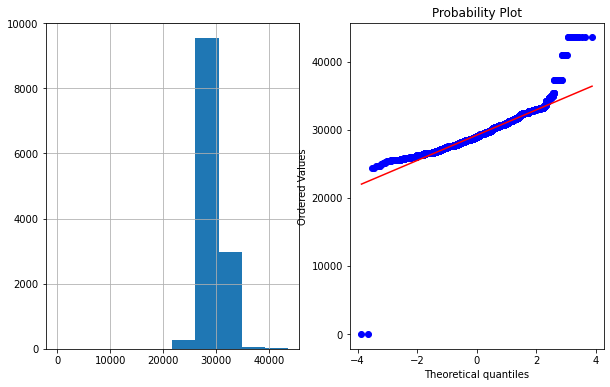

In [ ]:
#train_dist_transformed["cs_lv1_yeojohnson"], parameters = stat.yeojohnson(train_dist["closeststore__distance_lv1_desc"])
#plot_data(train_dist_transformed, "cs_lv1_yeojohnson")

income_imp["singles_yeo"], parameters = stat.yeojohnson(income_imp["singles"])
plot_data(income_imp, "singles_yeo")  

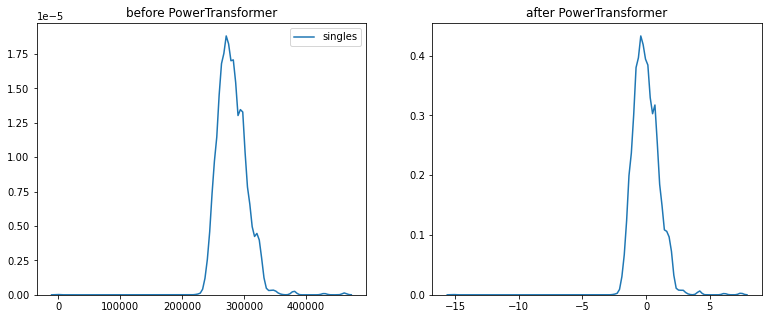

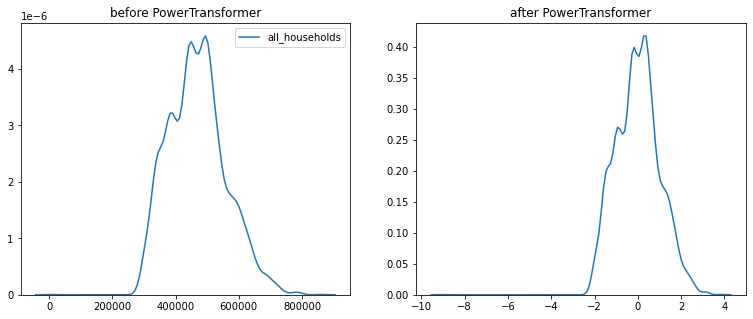

In [19]:
#plots(train_dist, "closeststore__distance_lv1_desc", PowerTransformer())
plots(income_imp, "singles", PowerTransformer())
plots(income_imp, "all_households", PowerTransformer())

AttributeError: 'DataFrame' object has no attribute 'all_house_yeo'

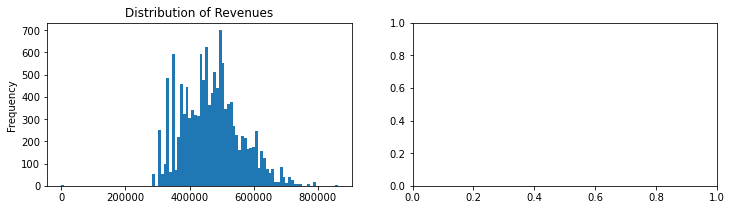

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
income_imp.all_households.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
income_imp.all_house_yeo.plot.hist(bins=100, ax = ax2)
ax2.set_title("Transformed")

## Using Scikitlearn PowerTransform can choose either Box-cox or Yeo-johnson 

In [21]:
pt = PowerTransformer(method = "box-cox")
cs_lv1_transformed = pt.fit_transform(train_dist[["closeststore__distance_lv1_desc"]])
train_dist_transformed["cs_lv1_boxcox_test"] = cs_lv1_transformed


NameError: name 'train_dist_transformed' is not defined

In [22]:
plot_data(train_dist_transformed, "cs_lv1_boxcox_test")

NameError: name 'train_dist_transformed' is not defined

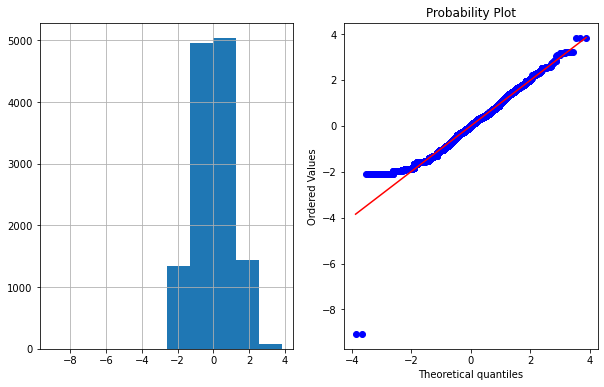

In [23]:
#pt2 = PowerTransformer()

#cs_lv1_pt = pt2.fit_transform(train_dist[["closeststore__distance_lv1_desc"]])
#train_dist_transformed["cs_lv1_yeojohson_test"] = cs_lv1_pt
#plot_data(train_dist_transformed, "cs_lv1_yeojohson_test")

pt2 = PowerTransformer()

income_all = pt2.fit_transform(income_imp[["all_households"]])
income_imp["pt_all_house"] = income_all

#income_singles = pt2.fit_transform(income_imp[["singles"]]) 
#income_imp["pt_singles"] = income_singles

plot_data(income_imp, "pt_all_house")
#plot_data(income_imp, "pt_singles")

### Do impuding and powertransformation directly to the train and test sets after testing above

In [24]:
income_imp_test

,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,386900.000000,294200.000000,659000.000000,799000.000000,624300.000000,381500.000000
1,475200.000000,272100.000000,595400.000000,707400.000000,713400.000000,367900.000000
2,451900.000000,269100.000000,578600.000000,662000.000000,734000.000000,372800.000000
3,497400.000000,293000.000000,614100.000000,858400.000000,778000.000000,413400.000000
4,489800.000000,329900.000000,705100.000000,819500.000000,714700.000000,400900.000000
...,...,...,...,...,...,...
8572,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8573,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8574,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795
8575,468908.502924,281114.280702,614534.280702,761482.444444,728590.502924,377456.584795


In [25]:
def powertransformer(df_original, df_impuded): 
    for col in df_impuded: 
        temp = PowerTransformer().fit_transform(df_impuded[[col]])
        df_original[f'pt_{col}'] = temp
    return df_original



In [26]:
pt = powertransformer(income_df, income_imp)
pt_test = powertransformer(income_df_test, income_imp_test)

/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [27]:
new_stores_train = pt.drop(include_list, axis = 1).set_index("store_id")
new_stores_test = pt_test.drop(include_list, axis = 1).set_index("store_id")

In [28]:
new_stores_train.to_csv("income_trans_train.csv")
new_stores_test.to_csv("income_trans_test.csv")